In [30]:
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np

In [31]:
# Image : Data which is considered in form of matrix
# It consists of multiple pixels

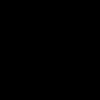

In [32]:
a = np.zeros([100,100])
cv2_imshow(a)

In [33]:
a.dtype

dtype('float64')

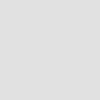

In [34]:
a = np.ones([100,100],dtype='uint8')*225
cv2_imshow(a)

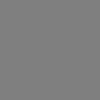

In [35]:
a = np.ones([100,100],dtype='uint8')*127
cv2_imshow(a)

In [36]:
# Different types
# 1. Grayscale(H W)
# 2.RGB Image(H W D)

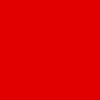

In [37]:
a = np.ones([100,100,3],dtype='uint8')*127
a[:,:]=[0,0,225] #BGR
cv2_imshow(a)

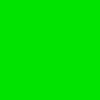

In [38]:
a = np.ones([100,100,3],dtype='uint8')*127
a[:,:]=[0,225,0] #BGR
cv2_imshow(a)

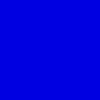

In [39]:
a = np.ones([100,100,3],dtype='uint8')*127
a[:,:]=[225,0,0] #BGR
cv2_imshow(a)

In [40]:
# Read image from the web

!wget https://stimg.cardekho.com/images/carexteriorimages/930x620/Lamborghini/Aventador/6721/Lamborghini-Aventador-SVJ/1621849426405/front-left-side-47.jpg -O demo.jpg

--2022-06-15 10:22:55--  https://stimg.cardekho.com/images/carexteriorimages/930x620/Lamborghini/Aventador/6721/Lamborghini-Aventador-SVJ/1621849426405/front-left-side-47.jpg
Resolving stimg.cardekho.com (stimg.cardekho.com)... 23.199.55.6, 23.199.55.28, 2600:1408:9000::172d:b4ca, ...
Connecting to stimg.cardekho.com (stimg.cardekho.com)|23.199.55.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112498 (110K) [image/jpeg]
Saving to: ‘demo.jpg’

demo.jpg            100%[===================>] 109.86K  --.-KB/s    in 0.03s   

2022-06-15 10:22:55 (4.27 MB/s) - ‘demo.jpg’ saved [112498/112498]



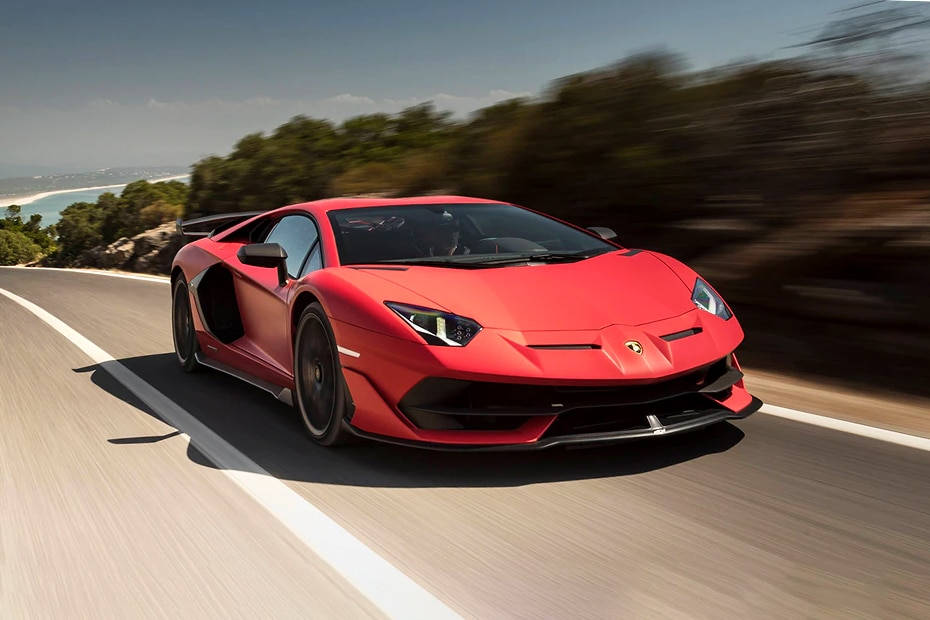

In [41]:
img = cv2.imread('demo.jpg')
cv2_imshow(img)

In [42]:
img.shape

(620, 930, 3)

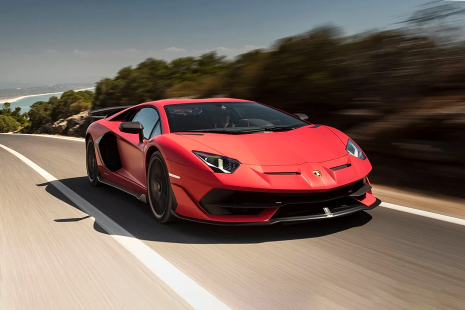

In [43]:
# Resize
img_res=cv2.resize(img,(465,310))
cv2_imshow(img_res)

In [44]:
img_res.shape

(310, 465, 3)

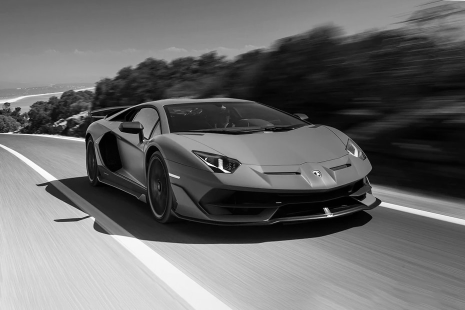

In [45]:
# Image Processing
# BGRtoGray

gray = cv2.cvtColor(img_res,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

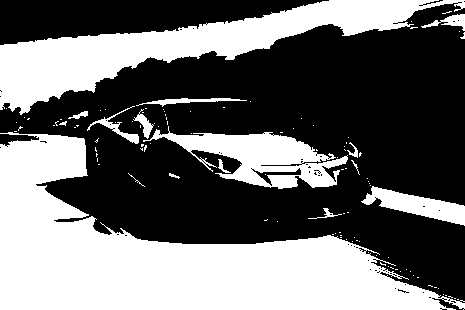

In [46]:
 # Black and white

 bw = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
 cv2_imshow(bw[1])

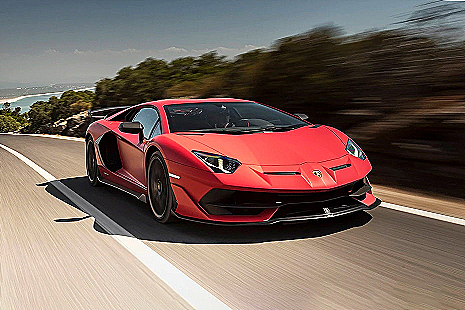

In [47]:
# Sharpen
kernel1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
op = cv2.filter2D(img_res,-1,kernel1)
cv2_imshow(op)

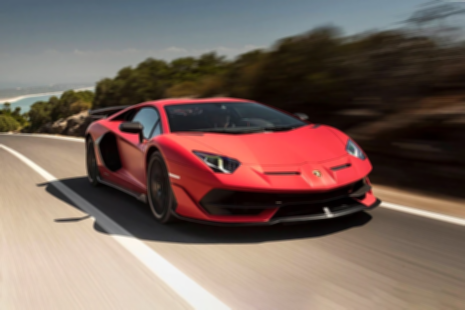

In [48]:
# Blur
kernel1 = np.ones([3,3])*(1/9)
op = cv2.filter2D(img_res,-1,kernel1)
cv2_imshow(op)

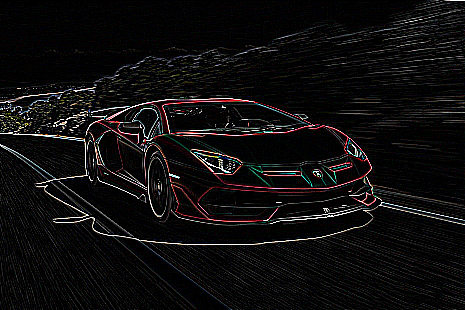

In [49]:
# Ridge detection
kernel1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
op = cv2.filter2D(img_res,-1,kernel1)
cv2_imshow(op)

In [50]:
import tensorflow as tf

In [51]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [53]:
cv2_imshow(x_train[0])

In [54]:
# CNN Architecture

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(70,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [56]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])